# Linear Regression Assignment

### Importing Required Libraries 

In [2271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

In [2272]:
# Reading the CSV 
bike_df = pd.read_csv('day.csv')

In [2273]:
# Getting basic idea about the dataframe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2274]:
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [2275]:
# Removing non-required columns instant is just index and other columns are included in the predictor column cnt
bike_df.drop(['instant','registered','casual'],axis=1,inplace=True)

In [2276]:
bike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Description 
- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
      

In [2278]:
# Converting to a datetime object
bike_df['dteday'] = pd.DatetimeIndex(bike_df['dteday'])

In [2279]:
bike_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Summary of Data imported
- 730 rows and 16 columns (instant column removed)
- All non null entries
- dteday converted to datetime data type

### Correlation and Heatmap to identify Correlation between the variables

In [2282]:
bike_df.corr()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,1.000000,2.274006e-01,8.660262e-01,3.078886e-01,-0.002119,-0.000830,0.005276,-0.040452,0.082705,0.081784,-0.052587,-0.051993,0.552980
season,0.227401,1.000000e+00,-3.272230e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,0.866026,-3.272230e-16,1.000000e+00,-5.149955e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,0.307889,8.310321e-01,-5.149955e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-0.002119,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-0.000830,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,0.005276,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,-0.040452,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,0.082705,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.081784,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685


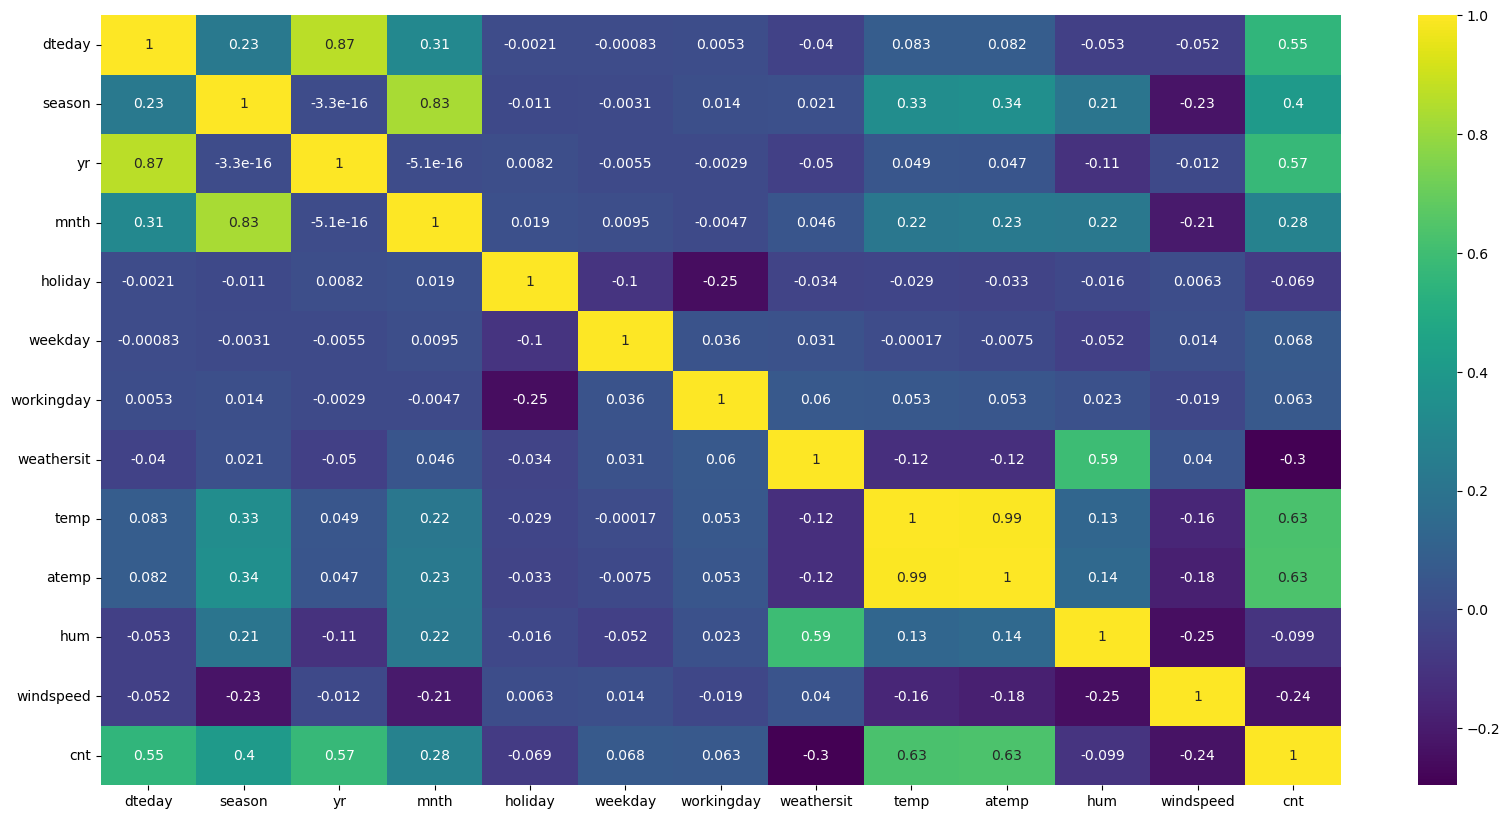

In [2283]:
# Creating to heatmap to see any clear correlations between variables
plt.figure(figsize=(20,10))
sns.heatmap(bike_df.corr(),cmap='viridis',annot=True)
plt.show()

#### Correlation Details
- yr and dteday
- season and mnth
  
Year and Date are highly correlated
Season and month are highly correlated

### EDA

### Discovering New Variables from Existing Data

In [2287]:
# Splitting date to year,month, day
bike_df['year'] = pd.DatetimeIndex(bike_df['dteday']).year
bike_df['month'] = pd.DatetimeIndex(bike_df['dteday']).month
bike_df['day'] = pd.DatetimeIndex(bike_df['dteday']).day

In [2288]:
bike_df.drop(['dteday','yr','mnth'],axis=1,inplace=True)

- yr dropped since it was recreated with Year Column
- mnth dropped since it was recreated with Month column
- dteday dropped since all it's data has been created using Year, Month, Day columns

In [2290]:
# Converting it to String variables to make it more descriptive
bike_df['season'] = bike_df['season'].apply(lambda x: 'Spring' if x==1 else 'Summer' if x == 2 else 'Fall' if x== 3 else 'Winter')
bike_df['weathersit'] = bike_df['weathersit'].apply(lambda x: 'Clear' if x==1 else 'Mist' if x == 2 else 'Light Snow' if x== 3 else 'Heavy Rain')

#### Categorical Columns Analysis

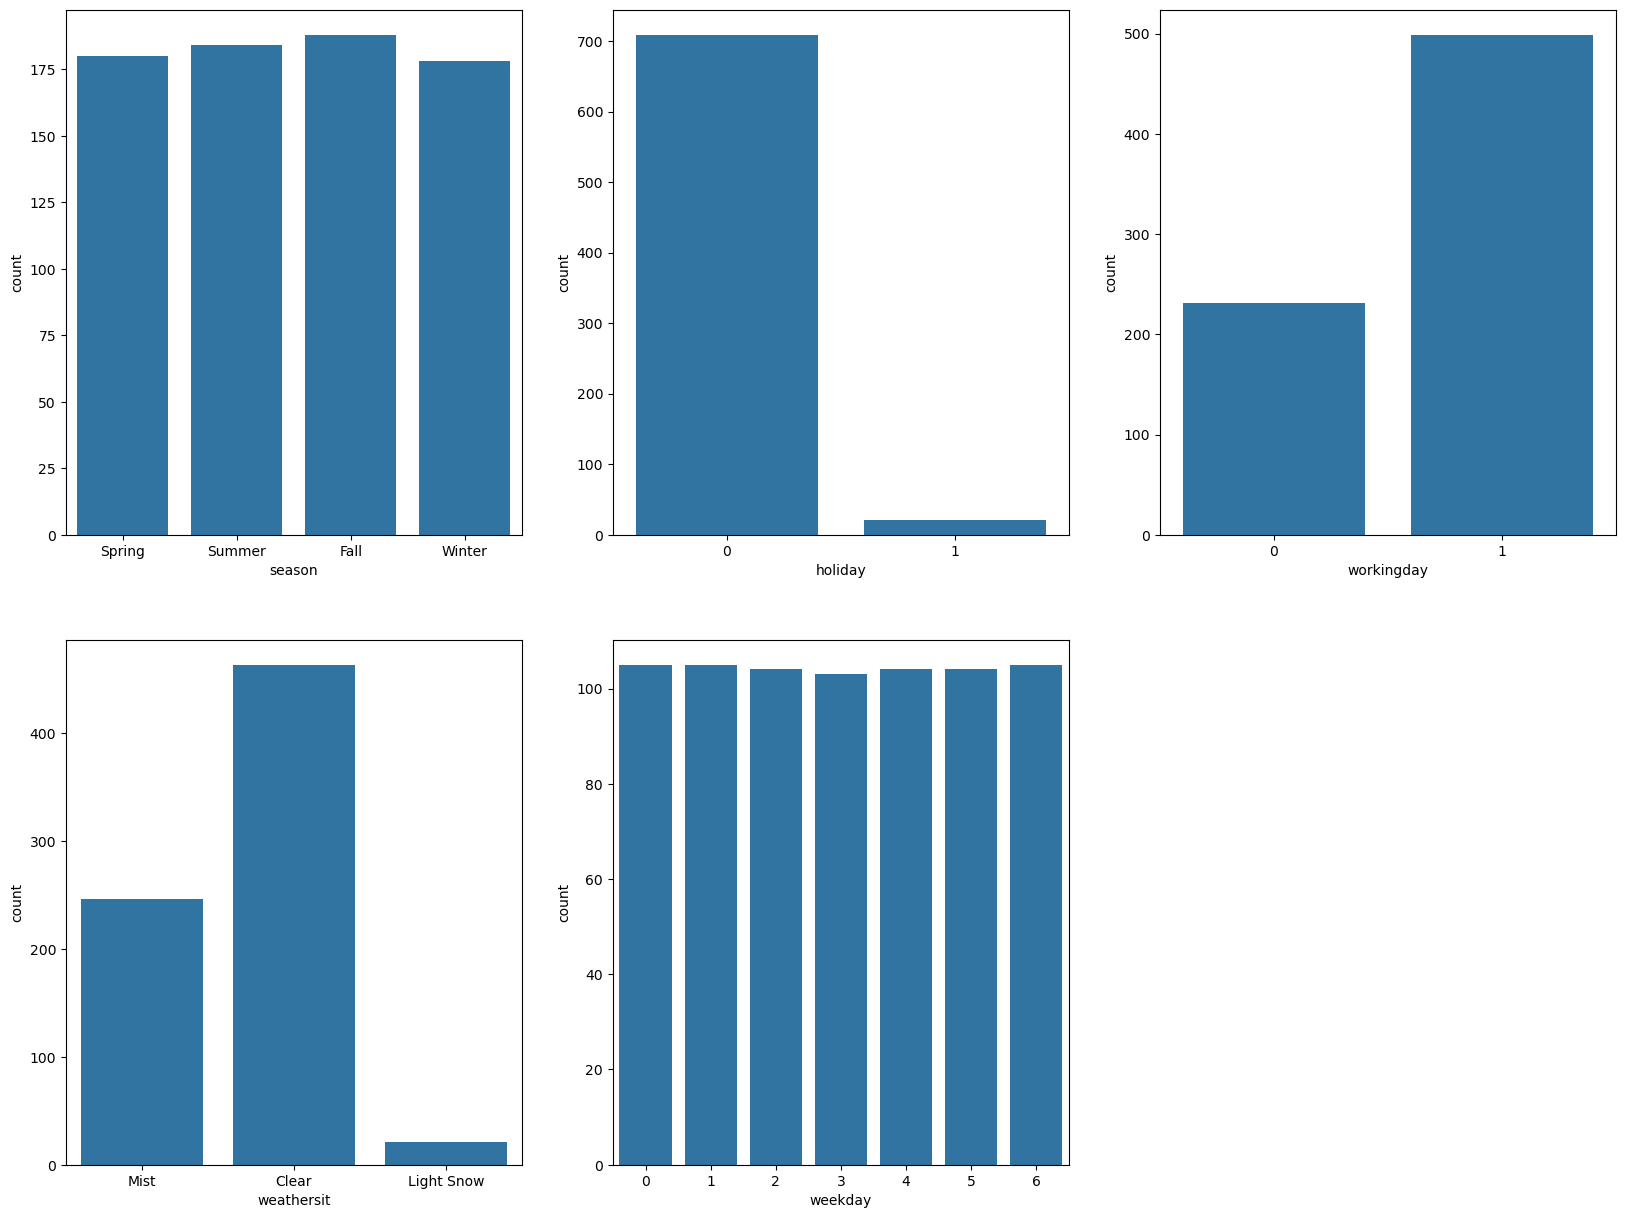

In [2292]:
# Countplot for categorical to identify any patterns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
axes = axes.flatten()

sns.countplot(data=bike_df,x='season',ax=axes[0])
sns.countplot(data=bike_df,x='holiday',ax=axes[1])
sns.countplot(data=bike_df,x='workingday',ax=axes[2])
sns.countplot(data=bike_df,x='weathersit',ax=axes[3])
sns.countplot(data=bike_df,x='weekday',ax=axes[4])
axes[5].set_visible(False)
plt.show()

### Categorical Univariate Analysis
- Mostly the weather is clear followed by Mist and light snow
- Number of working days are clearly more

### Numerical Variables Analysis

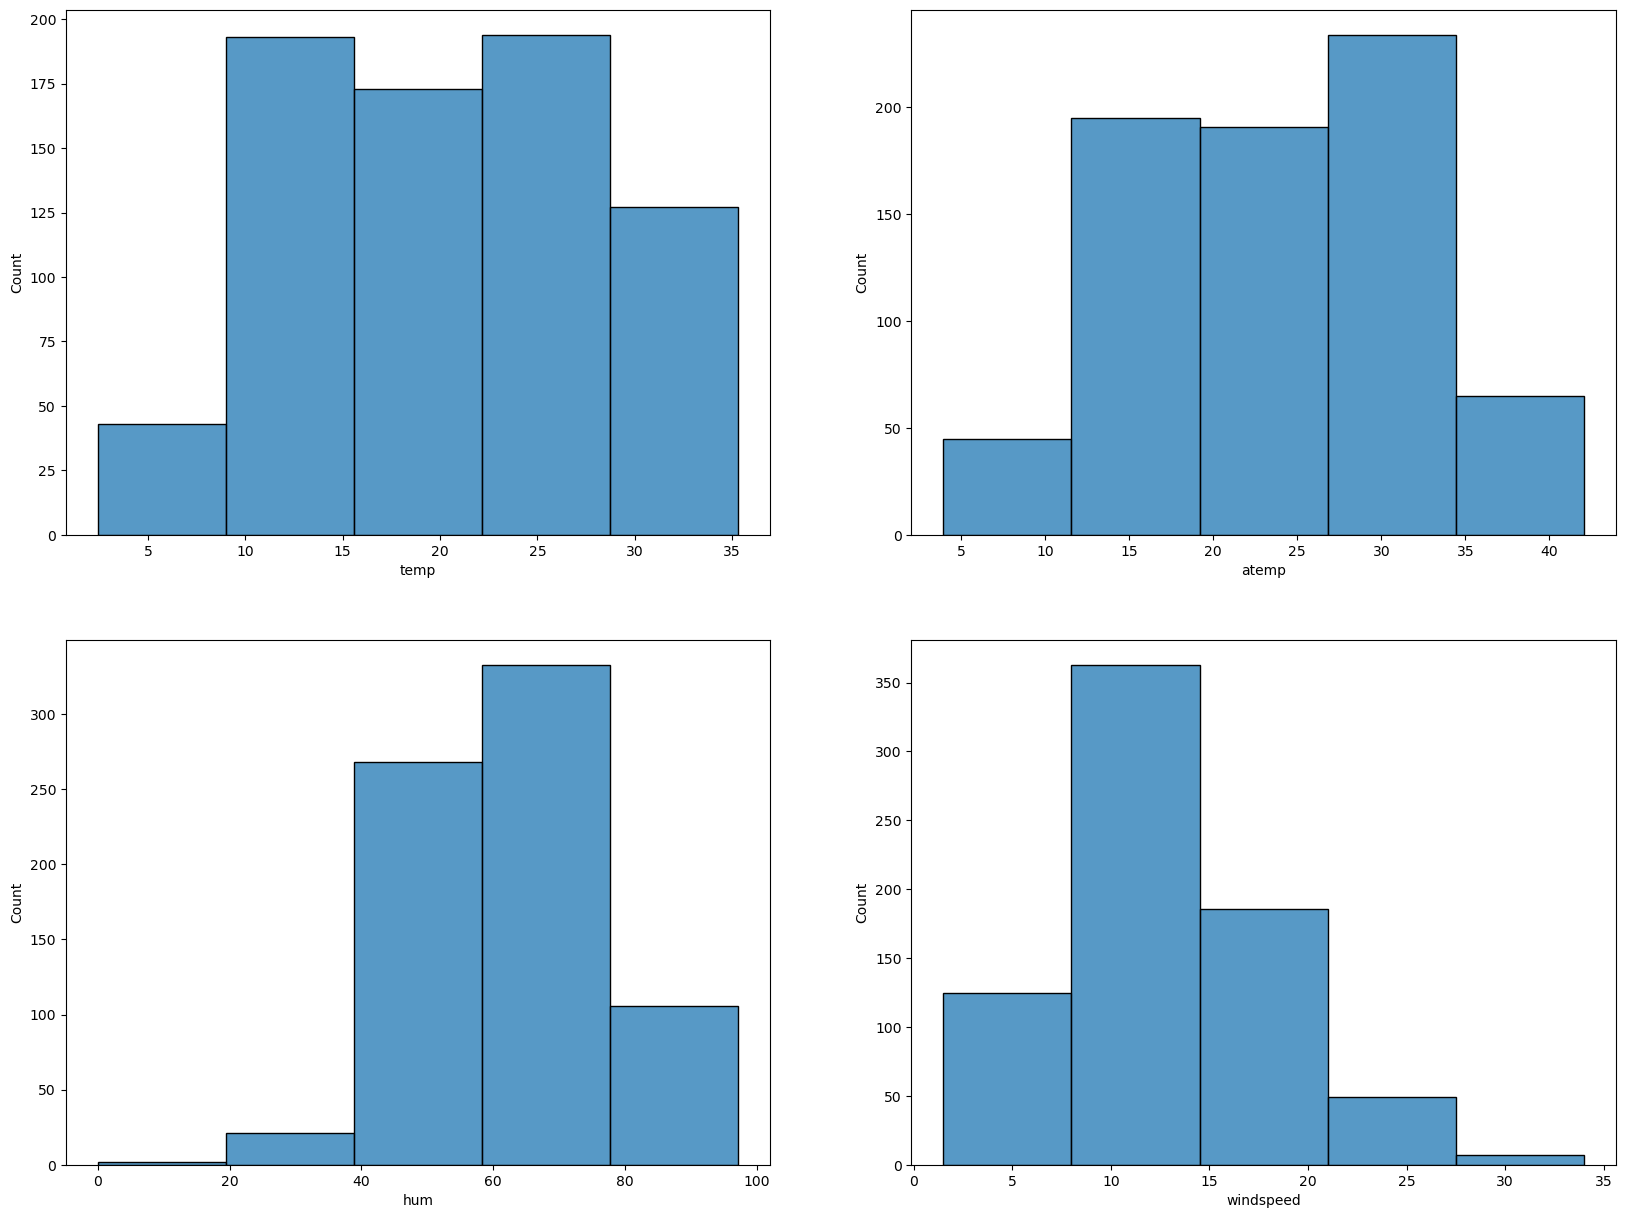

In [2295]:
# Histogram Plots for Numerical Analysis to identify any patterns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()

sns.histplot(data=bike_df,x='temp',bins=5,ax=axes[0])
sns.histplot(data=bike_df,x='atemp',bins=5,ax=axes[1])
sns.histplot(data=bike_df,x='hum',bins=5,ax=axes[2])
sns.histplot(data=bike_df,x='windspeed',bins=5,ax=axes[3])

plt.show()

#### Numerical Analysis Summary
- Humidity is mostly between 40-80
- Windspeed is between 8-20

### Bi-Variate Analysis

#### Drawing a Pairplot to visualize data with cnt as y axis and all other columns as x-axis

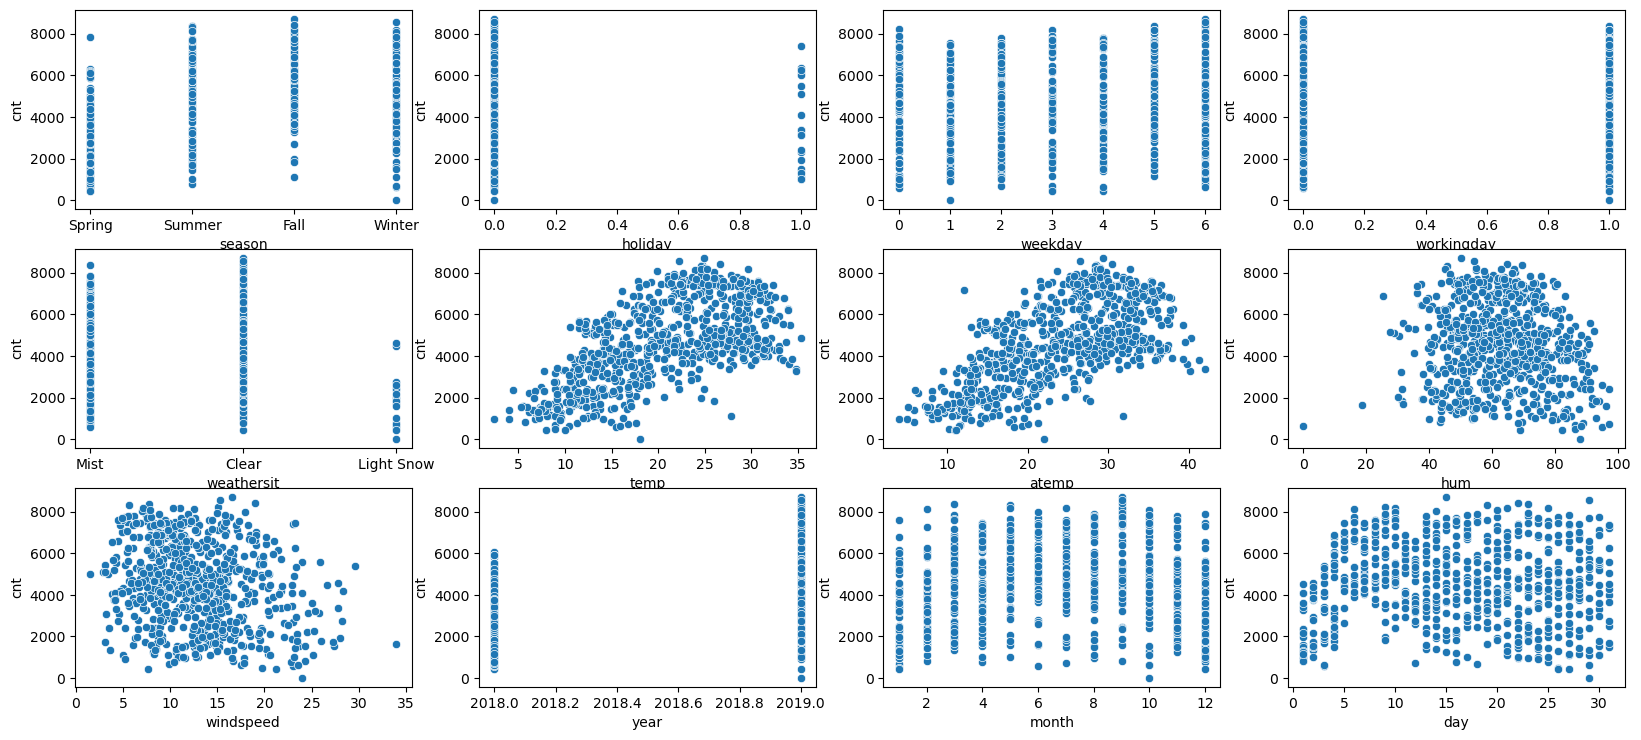

In [2299]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()

x_columns = list(bike_df.columns)
x_columns.remove('cnt')

for i, col in enumerate(x_columns):
    sns.scatterplot(x=bike_df[col],y=bike_df['cnt'],ax=axes[i])

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()


#### Correlation
From the graphs above there is a positive collinearity between
- temp and cnt
- atemp and cnt
- registered and cnt
- casual and cnt

Other Observations
- When there is light snow there is less chance of usage of bike since the numbers are mostly below 4k
- In fall season most count is greater than 3k
- we can see that in 2019 the growth of rental bikes have increased from 6k -> greater than 8k 

#### Creating dummy variables for categorical columns
- weathersit
- season

In [2303]:
season_dummy = pd.get_dummies(bike_df['season'],drop_first=True,dtype=int)

In [2304]:
season_dummy.value_counts()

Spring  Summer  Winter
0       0       0         188
        1       0         184
1       0       0         180
0       0       1         178
Name: count, dtype: int64

Season Value Explanation
- 0,0,0 - Fall
- 1,0,0 - Sprint
- 0,1,0 - Summer
- 0,0,1 - Winter

In [2306]:
weathersit_dummy = pd.get_dummies(bike_df['weathersit'],drop_first=True,dtype=int)
weathersit_dummy.value_counts()

Light Snow  Mist
0           0       463
            1       246
1           0        21
Name: count, dtype: int64

Weathersit Value Explanation 
- 0,0 - Clear
- 1,0 - Mist
- 0,1 - Light Snow

In [2308]:
bike_df = pd.concat([bike_df,season_dummy,weathersit_dummy],axis=1)

In [2309]:
bike_df.drop(['season','weathersit'],axis=1,inplace=True)

### Train Test Split 

In [2311]:
# Train Test Data Split in 70:30 Ratio
x_columns = list(bike_df.columns)
all_columns = list(bike_df.columns)

In [2312]:
df_train, df_test = train_test_split(bike_df,train_size=0.7,test_size=0.3,random_state=2)

In [2313]:
# Scaling train and test values in the range 0-1
scaler = MinMaxScaler()
df_train_scaled = df_train
df_train_scaled[all_columns] = scaler.fit_transform(df_train[all_columns])
df_test_scaled = df_test
df_test_scaled[all_columns] = scaler.transform(df_test[all_columns])


In [2314]:
x_columns.remove('cnt')

In [2315]:
X_scaled = df_train_scaled[x_columns]
X_scaled = sm.add_constant(X_scaled)
y_scaled = df_train_scaled['cnt']
X_test_scaled = df_test_scaled[x_columns]
y_test_scaled = df_test_scaled['cnt']

### Initial Model with all variables

In [2317]:
lr = sm.OLS(y_scaled,X_scaled)
lr_model = lr.fit()
lr_model.params

const         0.305071
holiday      -0.056552
weekday       0.033222
workingday    0.019748
temp          0.370541
atemp         0.100665
hum          -0.127039
windspeed    -0.180116
year          0.223555
month        -0.009363
day          -0.035622
Spring       -0.114847
Summer        0.025178
Winter        0.075328
Light Snow   -0.217020
Mist         -0.053678
dtype: float64

In [2318]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     161.1
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          3.70e-179
Time:                        20:22:40   Log-Likelihood:                 491.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     494   BIC:                            -882.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3051      0.036      8.454      0.0

### Using RFE to remove columns

In [2320]:
### Removing 3 Features using RFE
lr_m = LinearRegression()
lr_m.fit(X_scaled,y_scaled)
rfe = RFE(estimator=lr_m,n_features_to_select=12)
rfe = rfe.fit(X_scaled,y_scaled)

In [2321]:
list(zip(X_scaled.columns,rfe.support_,rfe.ranking_))

[('const', False, 5),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('month', False, 4),
 ('day', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 2),
 ('Winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [2322]:
X_train_rfe = X_scaled[X_scaled.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)

In [2323]:
rfe_lm = sm.OLS(y_scaled,X_train_rfe).fit()
rfe_lm.params

const         0.341723
holiday      -0.069100
weekday       0.032527
temp          0.301021
atemp         0.147919
hum          -0.125411
windspeed    -0.176160
year          0.224458
day          -0.035917
Spring       -0.137664
Winter        0.053168
Light Snow   -0.215677
Mist         -0.052486
dtype: float64

In [2324]:
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.0
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          1.39e-180
Time:                        20:22:40   Log-Likelihood:                 486.40
No. Observations:                 510   AIC:                            -946.8
Df Residuals:                     497   BIC:                            -891.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3417      0.031     10.922      0.0

### VIF

In [2326]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values,i),2) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)

In [2327]:
vif

,Features,VIF
0,const,55.97
3,temp,54.05
4,atemp,52.98
9,Spring,2.71
5,hum,2.04
10,Winter,1.79
12,Mist,1.62
11,Light Snow,1.35
6,windspeed,1.20
2,weekday,1.04


### Manual Tuning of the Model

#### Column Removal
- High p-value, High VIF
    - temp
    - atemp

In [2330]:
X_train_manual = X_train_rfe.drop(['atemp'],axis=1)

In [2331]:
manual_lm = sm.OLS(y_scaled,X_train_manual).fit()
manual_lm.params

const         0.344912
holiday      -0.070076
weekday       0.032124
temp          0.437948
hum          -0.122866
windspeed    -0.180544
year          0.224156
day          -0.036890
Spring       -0.137866
Winter        0.054261
Light Snow   -0.218178
Mist         -0.053019
dtype: float64

In [2332]:
print(manual_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          1.60e-181
Time:                        20:22:40   Log-Likelihood:                 485.83
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     498   BIC:                            -896.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3449      0.031     11.075      0.0

In [2333]:
vif = pd.DataFrame()
vif['Features'] = X_train_manual.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_manual.values,i),2) for i in range(X_train_manual.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)

In [2334]:
vif

,Features,VIF
0,const,55.44
3,temp,2.71
8,Spring,2.71
4,hum,2.03
9,Winter,1.77
11,Mist,1.62
10,Light Snow,1.34
5,windspeed,1.18
2,weekday,1.04
6,year,1.03


#### Removing Variables with High p-value with and low VIF
- weekday
- day

In [2336]:
X_train_manual = X_train_manual.drop(['weekday','day'],axis=1)

In [2337]:
manual_lm = sm.OLS(y_scaled,X_train_manual).fit()
manual_lm.params

const         0.354202
holiday      -0.077423
temp          0.434333
hum          -0.136168
windspeed    -0.182611
year          0.223263
Spring       -0.140600
Winter        0.048711
Light Snow   -0.212520
Mist         -0.048592
dtype: float64

In [2338]:
print(manual_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.9
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          3.45e-181
Time:                        20:22:40   Log-Likelihood:                 479.33
No. Observations:                 510   AIC:                            -938.7
Df Residuals:                     500   BIC:                            -896.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3542      0.030     11.799      0.0

In [2339]:
vif = pd.DataFrame()
vif['Features'] = X_train_manual.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_manual.values,i),2) for i in range(X_train_manual.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)

In [2340]:
vif

,Features,VIF
0,const,50.42
6,Spring,2.71
2,temp,2.70
3,hum,2.00
7,Winter,1.75
9,Mist,1.60
8,Light Snow,1.34
4,windspeed,1.18
5,year,1.03
1,holiday,1.01


### Train Model Score

In [2342]:
y_train_pred = manual_lm.predict(X_train_manual)
round(r2_score(y_train_pred,y_scaled),2)

0.78

### Test Model Score

### High p-value low VIF
- weekday
- day

Removing weekday,day and checking if p-value < 0.05 and VIF and <= 5

In [2345]:
final_x_columns = list(X_train_manual.columns)
final_x_columns.remove("const")

In [2346]:
X_test_scaled = X_test_scaled[final_x_columns]
X_test_scaled = sm.add_constant(X_test_scaled)

In [2347]:
y_test_pred = manual_lm.predict(X_test_scaled)

In [2348]:
round(r2_score(y_test_pred,y_test_scaled),2)

0.78

### Model Summary

In [2350]:
X_train_manual = X_train_manual.drop(['weekday','day'],axis=1)
manual_lm = sm.OLS(y_scaled,X_train_manual).fit()
manual_lm.params

KeyError: "['weekday', 'day'] not found in axis"

y_scaled = 0.3656 - 0.0780\*holiday + 0.4391\*temp - 0.1305\*hum - 0.1813*windspeed + 0.2228*year - 0.1406\*Spring + 0.0487\*Winter - 0.2125\*Light Snow -0.048592\*Mist

Model is not overfitted since the r2_score of 0.78 for test and train data show similar results and the adjusted r squared variance of 0.819 tells us that the model is able to explain of 81.9% of the data

In [ ]:
print(manual_lm.summary())

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_manual.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_manual.values,i),2) for i in range(X_train_manual.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

### Model Metrics

In [ ]:
test_columns = list(X_train_manual.columns)
test_columns.remove('const')

In [ ]:
X_test = df_test_scaled[test_columns]
X_test = sm.add_constant(X_test)
y_test = df_test_scaled['cnt']

In [ ]:
y_test_pred = manual_lm.predict(X_test)

In [ ]:
y_train_pred = manual_lm.predict(X_train_manual)

### Train Data Evaluation

In [ ]:
round(r2_score(y_train_pred,y_scaled))

### Test Data Evaluation

In [ ]:
round(r2_score(y_test_scaled,y_test_pred),2)

### Final Equation
cnt_scaled = 0.3542\*const - 0.0774\*holiday +  0.4343\*temp - 0.1362\*hum - 0.1826\*windspeed + 0.2233\*year - 0.1406\*Spring +  0.0487\*Winter - 0.2125\*Light Snow - 0.0486\*Mist